In [1]:
#Import Libraries and depend
#To View and Analyze data
import numpy as np
import pandas as pd
#Matplotlib, Seaborn and Plotly for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
#Linear Regression using Scikit-learn
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
#Remove Warning Messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
insurance_df = pd.read_csv("Resources/insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Exploring the data for higher level information
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


OLGA's part section 4:

Visualizing how the "charges" column is related to other columns ("children", "sex", "region" and "smoker").

    1. Visualizations
    
    2. Correlation
    
    3. Linear regression (skikit-learn)
    
    4. Loss/cost
    
    

# Visualizations

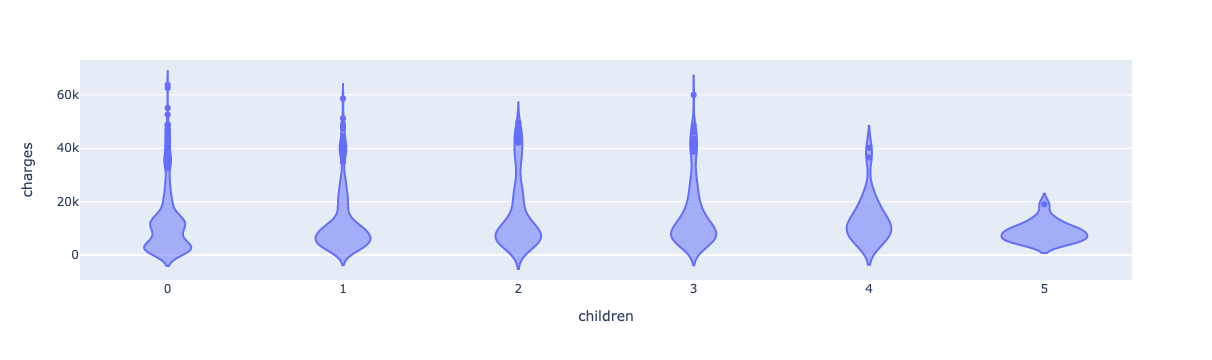

In [5]:
px.violin(insurance_df, x = 'children',y = 'charges')

<AxesSubplot:xlabel='sex', ylabel='charges'>

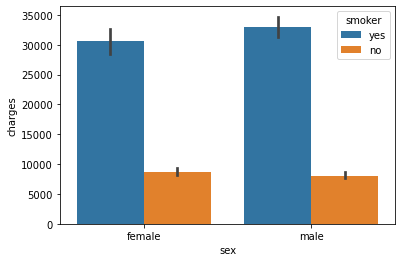

In [6]:
sns.barplot(data = insurance_df,x = 'sex',y = 'charges',hue = "smoker")

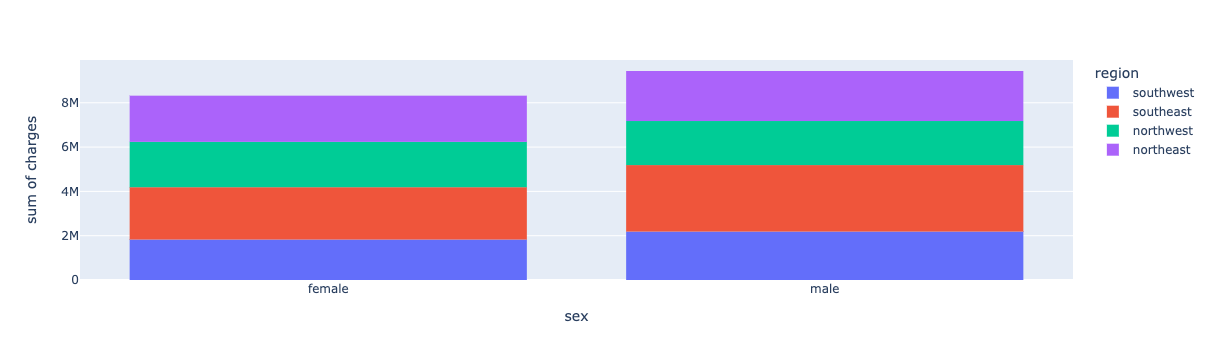

In [7]:
px.histogram(insurance_df,x='sex',y = 'charges',color = 'region')

# Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [8]:
insurance_df.charges.corr(insurance_df.age)

0.2990081933306477

In [9]:
insurance_df.charges.corr(insurance_df.bmi)

0.19834096883362887

In [10]:
insurance_df.children.corr(insurance_df.charges)

0.06799822684790482

In [11]:
#To compute the correlation for categorical columns, they must first be converted into numeric columns.
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = insurance_df.smoker.map(smoker_values)
insurance_df.charges.corr(smoker_numeric)

0.7872514304984773

In [12]:
insurance_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Here's how correlation coefficients can be interpreted

Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

Direction: The sign of the correlation coefficient represents the direction of the relationship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Pandas dataframes also provide a .corr method to compute the correlation coefficients between all pairs of numeric columns.

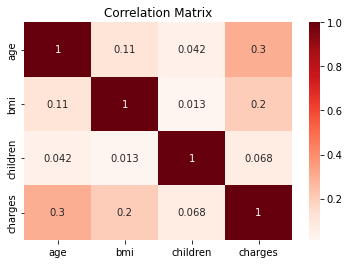

In [13]:
sns.heatmap(insurance_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

# # Linear Regression using Scikit-learn for Non Smokers

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# sex 0 or 1
label = LabelEncoder()
label.fit(insurance_df.sex.drop_duplicates())
insurance_df.sex = label.transform(insurance_df.sex)
# smoker or not
label.fit(insurance_df.smoker.drop_duplicates())
insurance_df.smoker = label.transform(insurance_df.smoker)
#region, each hregion has a number
label.fit(insurance_df.region.drop_duplicates())
insurance_df.region = label.transform(insurance_df.region)

insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [16]:
non_smoker_df = insurance_df[insurance_df.smoker == 0]

In [17]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.68500
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350


Next, let's visualize the relationship between "age" and "charges"

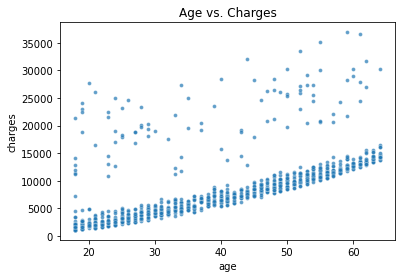

In [18]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

𝑦=𝑤𝑥+𝑏 
The line is characterized two numbers:  𝑤  (called "slope") and  𝑏  (called "intercept").



In [19]:
model = LinearRegression()

In [20]:
#create X and Y data matrices
X = non_smoker_df[['age']]
y = non_smoker_df.charges
print('X.shape :', X.shape)
print('y.shape :', y.shape)


X.shape : (1064, 1)
y.shape : (1064,)


In [21]:
#Perform 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Data dimention
X_train.shape, y_train.shape

((851, 1), (851,))

In [23]:
X_test.shape, y_test.shape

((213, 1), (213,))

In [24]:
from sklearn import linear_model
#Compute performance of the model
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
#Build Linear regression
model = LinearRegression()

In [26]:
#build training model
model.fit(X_train, y_train)

LinearRegression()

In [39]:
#Apply trained model to make prediction (on test set)
y_pred = model.predict(X_test)

In [40]:
#Prediction results
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [265.0401446]
Intercept: -1995.554158454397
Mean squared error (MSE): 19603075.14
Coefficient of determination (R^2): 0.44


In [29]:
#String Formatting
r2_score(y_test, y_pred)

0.441641810147521

In [30]:
y_test

41       4949.75870
1326     7050.02130
521      3994.17780
930      2927.06470
991      7144.86265
           ...     
723      1263.24900
74       7726.85400
163      5152.13400
1258    30063.58055
32       4687.79700
Name: charges, Length: 213, dtype: float64

In [31]:
np.array(y_test)

array([ 4949.7587 ,  7050.0213 ,  3994.1778 ,  2927.0647 ,  7144.86265,
        1727.54   , 11264.541  ,  3484.331  , 11381.3254 ,  3857.75925,
        5125.2157 , 10795.93733,  1720.3537 , 12913.9924 ,  9411.005  ,
       12479.70895,  5257.50795, 11363.2832 ,  1252.407  ,  2680.9493 ,
        7986.47525,  5080.096  , 12323.936  ,  7173.35995,  5693.4305 ,
        1646.4297 ,  3167.45585, 13352.0998 ,  6360.9936 , 26140.3603 ,
        1728.897  , 24227.33724,  6548.19505, 14418.2804 ,  4915.05985,
       11566.30055, 10422.91665,  4234.927  , 14382.70905,  3490.5491 ,
        5584.3057 ,  4544.2348 ,  8944.1151 ,  7160.094  ,  1682.597  ,
       11881.9696 ,  6198.7518 ,  9880.068  ,  4415.1588 ,  3176.2877 ,
        6686.4313 ,  2904.088  , 16455.70785,  8302.53565, 12244.531  ,
        1702.4553 ,  3766.8838 ,  2221.56445, 11165.41765,  1906.35825,
       10564.8845 ,  4074.4537 ,  1628.4709 ,  2755.02095, 23241.47453,
        7623.518  , 11454.0215 ,  5926.846  ,  2775.19215,  9549

In [32]:
y_pred

array([ 6220.6903241 ,  9136.13191468,  6485.73046869,  4895.4896011 ,
        8075.97133628,  2775.16844432, 12051.57350526,  4895.4896011 ,
       13376.77422825,  6220.6903241 ,  7280.85090249,  4100.36916731,
        2775.16844432, 13641.81437285, 10196.29249307, 12316.61364986,
        6750.77061329, 13376.77422825,  3040.20858892,  4895.4896011 ,
        8341.01148088,  4630.44945651, 13641.81437285,  8606.05162548,
        5955.6501795 ,  3040.20858892,  3570.28887811, 14436.93480665,
        6750.77061329, 10991.41292687,  3040.20858892, 13376.77422825,
        7545.89104709, 14967.01509584,  3305.24873351, 13111.73408365,
       12316.61364986,  4365.40931191, 13641.81437285,  4895.4896011 ,
        7545.89104709,  6485.73046869, 10196.29249307,  9136.13191468,
        3835.32902271, 12581.65379446,  7810.93119169, 11521.49321606,
        7015.81075789,  4895.4896011 ,  7810.93119169,  4895.4896011 ,
       14967.01509584,  9666.21220388, 13641.81437285,  2775.16844432,
      

<AxesSubplot:xlabel='charges'>

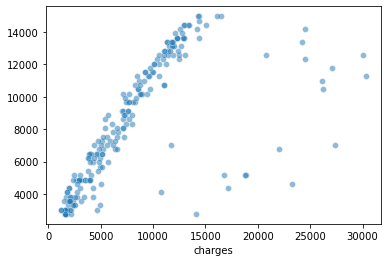

In [33]:
#Making the scatter plot
sns.scatterplot(y_test, y_pred, alpha=0.5)

In [34]:
#Testing prediction
data = {"age":50, "bmi":25, "children":2, "smoker":1, "region": 1}
index=[0]
cust_df=pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,1


In [35]:
cost_prediction= model.predict(cust_df)
print("The medical insurance cost fo the new customer is: ", cost_prediction)

ValueError: X has 5 features, but LinearRegression is expecting 1 features as input.

# Cost Function

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#A Cost Function is used to measure just how wrong the model is in finding a relation between the input and output. It tells you how badly your model is behaving/predicting

plt.scatter(X,y)


In [ ]:
import numpy

In [ ]:
theta =numpy.zeros((2,1))

new_x = numpy.delete(insurance_df["age"], numpy.s_[1:],1)
X = numpy.insert(new_x, 0, 1, axis=1)
learning_rate =0.01
initial_m=0
initial_b=0
iteration=1500
